In [ ]:
!pip install ta
import ta
!pip install yfinance 
import yfinance

  Created wheel for ta: filename=ta-0.10.1-py3-none-any.whl size=28985 sha256=8d9f4f3b49fa3811c8b874f8670a59646dd4aa7b315e5ee6a6f5cd2b39b1ce16
  Stored in directory: /root/.cache/pip/wheels/bc/2a/c2/a56e77d07edc16a1fa7fb012667e55cb0643cfa65996bddecc
Successfully built ta
     |████████████████████████████████| 6.4 MB 7.6 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium=

In [ ]:
#@title Default title text
import yfinance as yf
import matplotlib.pyplot as plt
import ta
import pandas as pd
import numpy as np
tickers = pd.read_csv('ind_niftyfinancelist.csv')
tickers = tickers.Symbol.to_list()
tickers = [i +'.NS' for i in tickers]
tickers





['AXISBANK.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'CHOLAFIN.NS',
 'HDFCAMC.NS',
 'HDFCBANK.NS',
 'HDFCLIFE.NS',
 'HDFC.NS',
 'ICICIBANK.NS',
 'ICICIGI.NS',
 'ICICIPRULI.NS',
 'KOTAKBANK.NS',
 'MUTHOOTFIN.NS',
 'PEL.NS',
 'PFC.NS',
 'RECLTD.NS',
 'SBICARD.NS',
 'SBILIFE.NS',
 'SRTRANSFIN.NS',
 'SBIN.NS']

In [ ]:
tickers.pop(4)

'HDFCAMC.NS'

In [ ]:
tickers.pop(8)

'ICICIGI.NS'

In [ ]:
tickers.pop(8)

'ICICIPRULI.NS'

In [ ]:
tickers.pop(13)

'SBICARD.NS'

In [ ]:
tickers.pop(13)

'SBILIFE.NS'

In [ ]:
len(tickers)


15

In [ ]:
tickers.pop(5)

'HDFCLIFE.NS'

In [ ]:
def MACDC(asset):
  df = yf.download(asset,start = '2012-03-03',end = '2016-03-02')
  df['EMA12'] = df.Close.ewm(span=12).mean()
  df['EMA26'] = df.Close.ewm(span=26).mean()
  df['MACD'] = df.EMA12 - df.EMA26
  df['signal'] = df.MACD.ewm(span=9).mean()
  
  ret = df.Close.diff()
  up,down = [],[]
  for i in range(len(ret)):
    if ret[i]<0:
      down.append(ret[i])
      up.append(0)
    else:
     up.append(ret[i])
     down.append(0)
  upseries = pd.Series(up)
  downseries = pd.Series(down).abs()
  upewm = upseries.ewm(com = 14,adjust = False).mean()
  downewm = downseries.ewm(com =14,adjust = False).mean()
  rs = upewm/downewm
  rsi = 100 - (100/(1+rs))
  rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(df.Close.index)
  rsi_df = rsi_df.dropna()
  df['RSI'] = rsi_df[3:]
  #df['RSI2'] = ta.RSI(df['Close'], timeperiod = 14)



  #df['VEMA12'] = df.Volume.ewm(span=12).mean()/pow(10,5)
  #df['VEMA26'] = df.Volume.ewm(span=26).mean()/pow(10,5)
  #df['VMACD'] =df.VEMA12 -df.VEMA26
 # df['Vsignal'] = df.VMACD.ewm(span=9).mean()/pow(10,5)
  #df['price_t'] = df.Close.shift(1)
  
  print("Indicators added ")
  return df
MACDC(tickers[0])



[*********************100%***********************]  1 of 1 completed
Indicators added 


,Open,High,Low,Close,Adj Close,Volume,EMA12,EMA26,MACD,signal,RSI
Date,,,,,,,,,,,
2012-03-05,233.000000,233.800003,228.550003,230.000000,214.781052,6837555,230.000000,230.000000,0.000000,0.000000,NaN
2012-03-06,229.779999,240.000000,221.149994,229.500000,214.314117,19573025,229.729167,229.740385,-0.011218,-0.006232,NaN
2012-03-07,228.000000,233.990005,226.149994,232.970001,217.554504,11241830,230.994065,230.900755,0.093311,0.034564,NaN
2012-03-09,237.800003,243.800003,237.000000,242.679993,226.622025,11864430,234.682856,234.193715,0.489141,0.188554,NaN
2012-03-12,250.000000,251.529999,242.630005,245.000000,228.788498,9704070,237.485987,236.699737,0.786250,0.366355,97.255468
...,...,...,...,...,...,...,...,...,...,...,...
2016-02-24,385.000000,391.000000,377.250000,386.649994,378.870300,11983475,394.900894,400.603486,-5.702592,-5.921078,43.640483
2016-02-25,386.100006,387.799988,377.450012,378.200012,370.590363,9491615,392.331527,398.943969,-6.612442,-6.059350,40.807799
2016-02-26,385.000000,390.299988,382.149994,386.350006,378.576355,9588881,391.411293,398.011083,-6.599790,-6.167438,44.528648


In [ ]:
def getbuysignals(df):
 Buy = []
 df['signal'] = np.nan
 df['position'] = np.nan
 for i in range(len(df)):
  df['signal'].iloc[i] = 0
 
 for i in range(2,len(df)-1):
   if df.MACD.iloc[i] > df.signal.iloc[i] and df.MACD.iloc[i-1]<df.signal.iloc[i-1] and df.RSI.iloc[i]>50 : 
    Buy.append(i)
    df['signal'].iloc[i+1] = 1

  
   Realbuys = [i+1 for i in Buy]
   
 return Realbuys

def getsellsignals(df):
 Sell = []
 df['signal'] = np.nan
 df['position'] = np.nan
 for i in range(len(df)):
  df['signal'].iloc[i] = 0
 for i in range(2,len(df)-1):
  if df.MACD.iloc[i]<df.signal.iloc[i] and df.MACD.iloc[i-1]>df.signal.iloc[i-1] and df.RSI.iloc[i]<50:
   Sell.append(i)
   df['signal'].iloc[i+1] = -1
   
   RealSells =[i+1 for i in Sell]
 return RealSells

def getposition(df):
 df.position.iloc[1] = 0
 flag = 0
 for i in range(len(df)):
  if(flag == 0 and df['signal'].iloc[i] == 1):
   df['position'].iloc[i] = 1
   flag = 1
  elif(flag == 1 and df['signal'].iloc[i] == -1):
   df['position'].iloc[i] = 0
   flag = 0
  else:
   df['position'].iloc[i] = df['position'].iloc[i-1]

 





#buy , sell = getsignals(df)
def getdates(df):
  date = []
  for i in range(len(df)):
    date.append(df.iloc[i].index)
  return date


















[*********************100%***********************]  1 of 1 completed
Indicators added 


In [ ]:
MACDC(tickers[0])

[*********************100%***********************]  1 of 1 completed
Indicators added 


,Open,High,Low,Close,Adj Close,Volume,EMA12,EMA26,MACD,signal,RSI
Date,,,,,,,,,,,
2012-03-05,233.000000,233.800003,228.550003,230.000000,214.781036,6837555,230.000000,230.000000,0.000000,0.000000,NaN
2012-03-06,229.779999,240.000000,221.149994,229.500000,214.314133,19573025,229.729167,229.740385,-0.011218,-0.006232,NaN
2012-03-07,228.000000,233.990005,226.149994,232.970001,217.554520,11241830,230.994065,230.900755,0.093311,0.034564,NaN
2012-03-09,237.800003,243.800003,237.000000,242.679993,226.621994,11864430,234.682856,234.193715,0.489141,0.188554,NaN
2012-03-12,250.000000,251.529999,242.630005,245.000000,228.788513,9704070,237.485987,236.699737,0.786250,0.366355,97.255468
...,...,...,...,...,...,...,...,...,...,...,...
2016-02-24,385.000000,391.000000,377.250000,386.649994,378.870331,11983475,394.900894,400.603486,-5.702592,-5.921078,43.640483
2016-02-25,386.100006,387.799988,377.450012,378.200012,370.590393,9491615,392.331527,398.943969,-6.612442,-6.059350,40.807799
2016-02-26,385.000000,390.299988,382.149994,386.350006,378.576355,9588881,391.411293,398.011083,-6.599790,-6.167438,44.528648


In [ ]:
def plot(df):
 plt.plot(df.iloc[getdates(df)].index ,df.iloc[getdates(df)].Close)
 plt.xlabel('Date')
 plt.ylabel('Close Price')
 plt.show()

In [ ]:
def getsignals2(df):
 plt.figure(figsize = (12,4))
 plt.scatter(df.iloc[getbuysignals(df)].index,df.iloc[getbuysignals(df)].Close,marker = '^',color = 'green')
 plt.scatter(df.iloc[getsellsignals(df)].index,df.iloc[getsellsignals(df)].Close,marker = '^',color = 'red')
 plt.plot(df.Close , label='stock',color = 'black')
 plt.plot(df.signal , label = 'signal',color = 'red')
 plt.plot(df.MACD, label = 'macd',color = 'green')

 plt.legend()
 plt.show()

In [ ]:
def profits(df):
 Buyprices = df.Open.iloc[getbuysignals(df)]
 Sellprices = df.Open.iloc[getsellsignals(df)]

 if Sellprices.index[0]<Buyprices.index[0]:
  Sellprices = Sellprices.drop(Sellprices.index[0])
 elif Buyprices.index[-1]> Sellprices.index[-1]:
  Buyprices = Buyprices.drop(Buyprices.index[-1])

 profitsrel = []
 mint = min(len(Sellprices),len(Buyprices))

 for i in range(mint):
  profitsrel.append((Sellprices[i] - Buyprices[i])/Buyprices[i])

 return profitsrel

def getreturns(df):
  returns = []
  for i in range(1,len(df)):
    returns.append((df.Close.iloc[i]/df.price_t.iloc[i] )-1)
  return sum(returns)/len(returns)

getreturns(MACDC(tickers[6]))




 











[*********************100%***********************]  1 of 1 completed
Indicators added 


0.0003667697158641351

In [ ]:
profits(MACDC(tickers[1]))

[*********************100%***********************]  1 of 1 completed
Indicators added 


[0.5964135752023095,
 0.576543592310771,
 0.545641089023802,
 0.16097553658124847,
 0.30802603713849275,
 -0.2469265006602498,
 -0.11903853986059555,
 2.2739001183842906,
 2.780941233915441,
 2.4739803839785286]

In [ ]:

def getwins(df):
 wins = [i for i in profits(df) if i>0]
 return wins
def getlosses(df):
  losses = [i for i in profits(df) if i <0]
  return losses

def getmaxp(df):
  maxp = max(getwins(df))
  return maxp
def getmaxlp(df):
  if len(getlosses(df))== 0:
    return 0
  else:
    minlp = min(getlosses(df))
    return minlp
def getwinp(df):
 winp = len(getwins(df))/len(profits(df))
 return winp
def getdd(df):
 maxdraw = (df.Close.max() - df.Close.min())/df.Close.min()
 return maxdraw

In [ ]:
def getfinalprofit(df):
 finalprofit = sum(profits(df))/len(profits(df))
 return finalprofit

In [ ]:
csignals = []
cprofits = []
for i in range(len(tickers)):
  dframe = MACDC(tickers[i])
  buy  = getbuysignals(dframe)
  sell = getsellsignals(dframe)
  profits1 = profits(dframe)
  csignals.append(buy)
  cprofits.append(profits1)



[*********************100%***********************]  1 of 1 completed
Indicators added 
[*********************100%***********************]  1 of 1 completed
Indicators added 
[*********************100%***********************]  1 of 1 completed
Indicators added 
[*********************100%***********************]  1 of 1 completed
Indicators added 
[*********************100%***********************]  1 of 1 completed
Indicators added 
[*********************100%***********************]  1 of 1 completed
Indicators added 
[*********************100%***********************]  1 of 1 completed
Indicators added 
[*********************100%***********************]  1 of 1 completed
Indicators added 
[*********************100%***********************]  1 of 1 completed
Indicators added 
[*********************100%***********************]  1 of 1 completed
Indicators added 
[*********************100%***********************]  1 of 1 completed
Indicators added 
[*********************100%*****************

In [ ]:
allprofit = []
for i in cprofits:
  for e in i:
    allprofit.append(e)

sum(allprofit)/len(allprofit)

0.15891288200174772

In [ ]:
cwins = [i for i in allprofit if i>0]
len(cwins)/len(allprofit)

0.5106382978723404

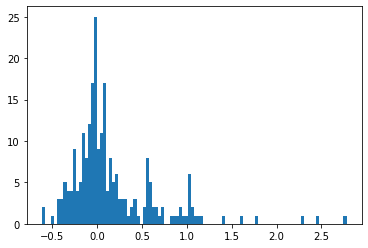

In [ ]:
plt.hist(allprofit,bins=100)
plt.show()

In [ ]:
dframe

,Open,High,Low,Close,Adj Close,Volume,EMA12,EMA26,MACD,signal,RSI,VEMA12,VEMA26,VMACD,Vsignal
Date,,,,,,,,,,,,,,,
2012-03-05,623.864014,632.706177,615.021851,615.856934,609.589600,101206,615.856934,615.856934,0.000000,0.000000,NaN,1.012060,1.012060,0.000000,0.000000e+00
2012-03-06,609.127075,641.548340,595.765564,598.712952,592.620117,136018,606.570610,606.955251,-0.384641,-0.213689,NaN,1.200625,1.192815,0.007810,4.339103e-08
2012-03-07,595.372620,602.151611,590.804138,593.309448,587.271606,54536,601.394776,602.052446,-0.657671,-0.395649,NaN,0.944875,0.960190,-0.015316,-3.716078e-08
2012-03-09,599.302429,609.127075,592.326965,599.105957,593.009155,73799,600.672285,601.228737,-0.556452,-0.450121,NaN,0.879569,0.898073,-0.018503,-8.725363e-08
2012-03-12,603.183167,618.853455,599.498962,603.969177,597.822754,59274,601.568039,601.864256,-0.296217,-0.404338,NaN,0.801639,0.827265,-0.025626,-1.375294e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-25,1614.000000,1614.000000,1595.000000,1600.349976,1595.722534,45835,1682.239518,1754.182305,-71.942788,-59.003868,26.927532,0.414675,0.469322,-0.054647,-2.383526e-07
2016-02-26,1602.000000,1617.000000,1589.000000,1601.650024,1597.018677,47288,1669.841134,1742.883618,-73.042484,-61.811591,27.204701,0.423630,0.469585,-0.045956,-2.825933e-07
2016-02-29,1601.000000,1632.800049,1586.849976,1611.900024,1607.239258,32484,1660.927117,1733.181129,-72.254012,-63.900075,29.476005,0.408431,0.458863,-0.050432,-3.269390e-07


In [ ]:
def getreturns(df):
 returns = []
 df['price_t']=df['Adj Close'].shift(1)
 returns = (df['Adj Close']/df['price_t']) - 1
 return returns


In [ ]:
#display data in a csv file 
import csv
with open('summary.csv','w',newline='') as file:
  writer = csv.writer(file)
  writer.writerow(["stratergyreturn",'annual return',"win percent", "max profit percent" , 'max loss percent' , 'maxdrawdown' , 'losses'  ])
  
  for i in range(0,7):
   dframe = MACDC(tickers[i])
   writer.writerow([getfinalprofit(dframe),getreturns(dframe),getwinp(dframe),getmaxp(dframe),getmaxlp(dframe),getdd(dframe),getlosses(dframe)])
  
  for i in range(7,14):
   dframe = MACDC(tickers[i])
   writer.writerow([getfinalprofit(dframe),getreturns(dframe),getwinp(dframe),getmaxp(dframe),getmaxlp(dframe),getdd(dframe),getlosses(dframe)])

[*********************100%***********************]  1 of 1 completed
Indicators added 
[*********************100%***********************]  1 of 1 completed
Indicators added 
[*********************100%***********************]  1 of 1 completed
Indicators added 
[*********************100%***********************]  1 of 1 completed
Indicators added 
[*********************100%***********************]  1 of 1 completed
Indicators added 
[*********************100%***********************]  1 of 1 completed
Indicators added 
[*********************100%***********************]  1 of 1 completed
Indicators added 
[*********************100%***********************]  1 of 1 completed
Indicators added 
[*********************100%***********************]  1 of 1 completed
Indicators added 
[*********************100%***********************]  1 of 1 completed
Indicators added 
[*********************100%***********************]  1 of 1 completed
Indicators added 
[*********************100%*****************

In [3]:
#portfolio 
def getportfolio(df):
 portfolio = pd.DataFrame()
 portfolio['Position'] = df.position
 portfolio['Total_Capital'] = np.nan
 portfolio['PnL'] = np.nan
 
 portfolio.Total_Capital.iloc[0] = 100000
 portfolio.PnL.iloc[0] = 0
 for i in range(1, len(portfolio)):
  if(portfolio.Position.iloc[i-1] == 0 and portfolio.Position.iloc[i] == 1):
   portfolio.Total_Capital.iloc[i] = portfolio.Total_Capital.iloc[i-1] * df['Close'].iloc[i]/ df['Open'].iloc[i]
  elif (portfolio.Position.iloc[i-1] == 1 and portfolio.Position.iloc[i] == 1):
   portfolio.Total_Capital.iloc[i] = portfolio.Total_Capital.iloc[i-1] * df['Close'].iloc[i]/ df['Close'].iloc[i-1]
  else:
   portfolio.Total_Capital.iloc[i] = portfolio.Total_Capital.iloc[i-1]
    
   portfolio.PnL.iloc[i] = portfolio.Total_Capital.iloc[i] - portfolio.Total_Capital.iloc[0]
    
 return portfolio